# Boston Dataset: Regresión

Los datos describen la información de 506 distritos o ciudades de Boston. Entre la información considerada está el número de piezas por vivienda, la proporción profesor-alumno, el porcentaje de crímenes por persona, etc. 

#### Variables

* CRIM - Crímenes por persona
* ZN - proporción de tierra residencial zonificada para lotes de más de 25.000 ft2
* INDUS - proporción de hectáreas de negocios no minoristas por ciudad
* CHAS - variable binaria. 1 si pasa el río Charles River, 0 si no
* NOX - concentración de contaminación
* RM - número medio de habitaciones por vivienda
* AGE - proporción de viviendas ocupadas por sus propietarios construidas antes de 1940
* DIS - distancias ponderadas a cinco centros de empleo de Boston
* RAD - índice de accesibilidad a las carreteras principales
* TAX - tasa del impuesto sobre la propiedad de valor por 10.000 dólares
* PTRATIO - proporción profesor-alumno
* B - 1000(Bk - 0.63)^2 donde Bk es la proporción de afroamericanos por ciudad
* LSTAT - nivel de pobreza de la población
* MEDV - valor medio de las viviendas

#### Propuesta

Se propone diseñar un modelo que logre predecir el valor medio de las viviendas (MEDV) de un distrito a partir de las demás variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importar datos

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data = pd.read_csv('housing.csv', header=None, delimiter="\s+", names=column_names)

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Análisis descriptivo

In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# No hay datos nulos
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

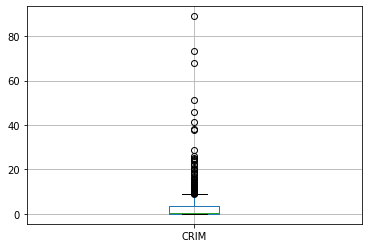

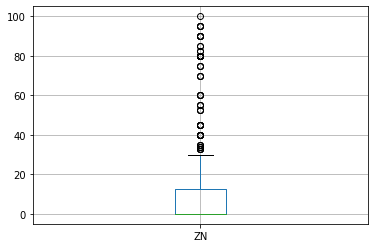

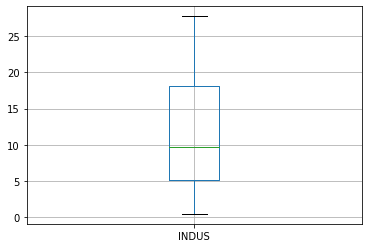

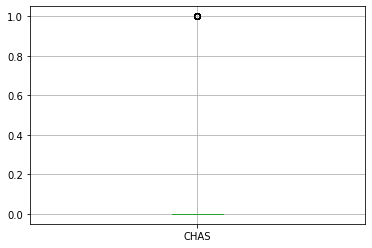

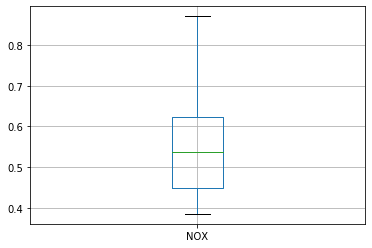

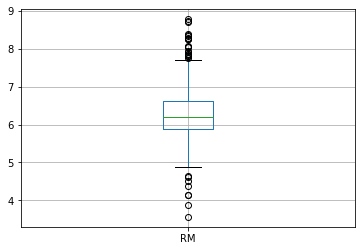

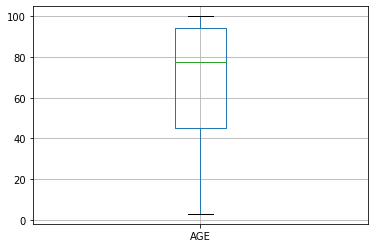

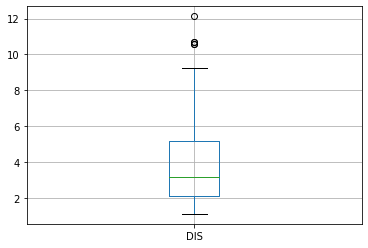

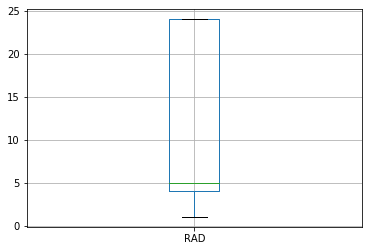

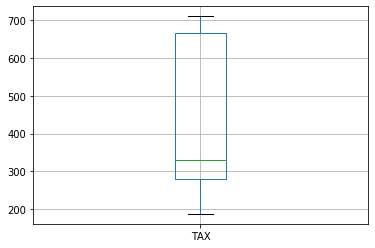

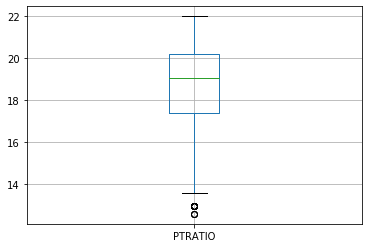

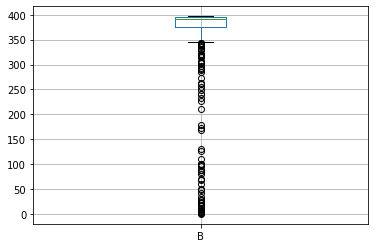

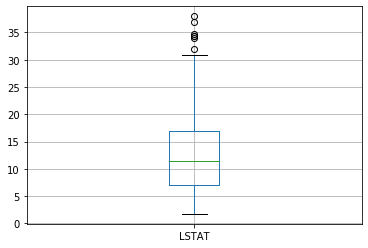

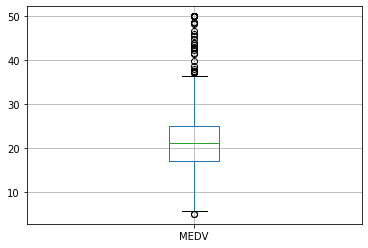

In [8]:
# Boxplot para cada variable
for column in data:
    plt.figure()
    data.boxplot([column])

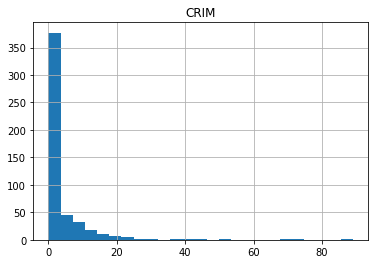

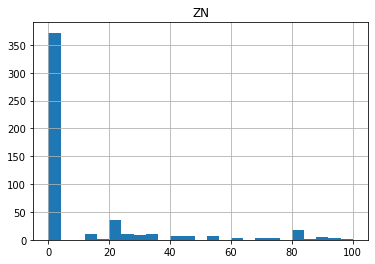

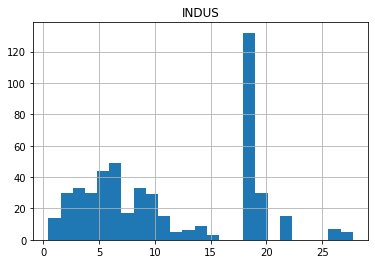

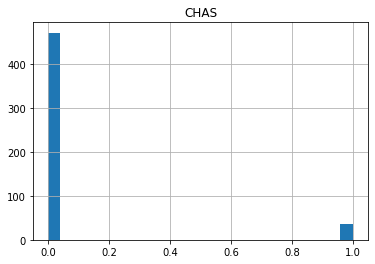

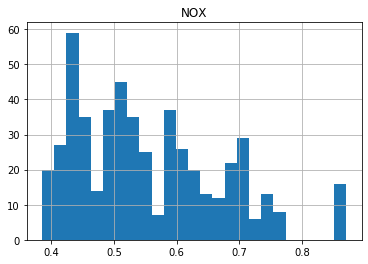

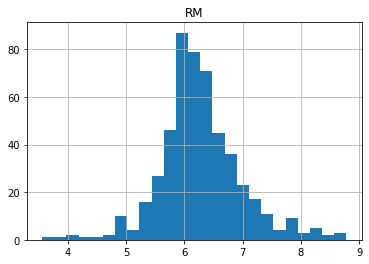

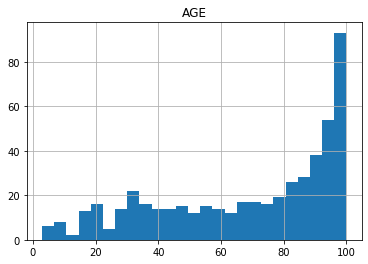

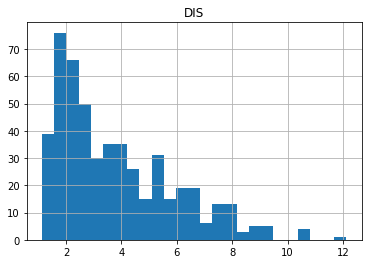

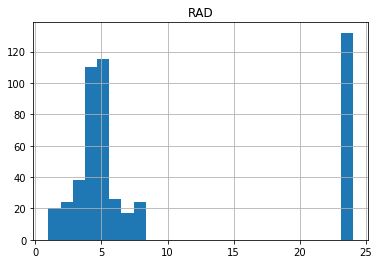

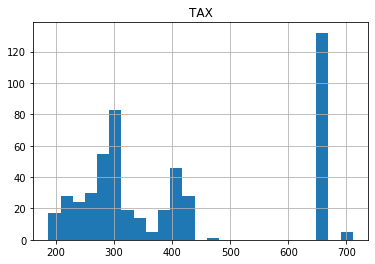

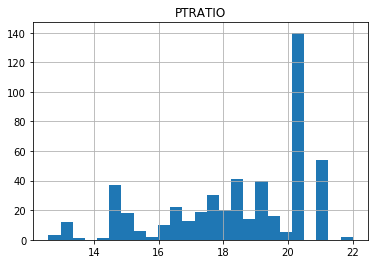

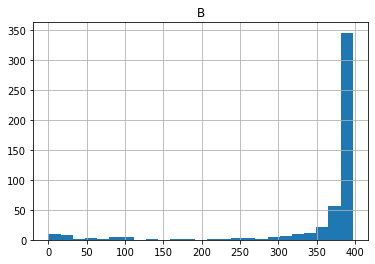

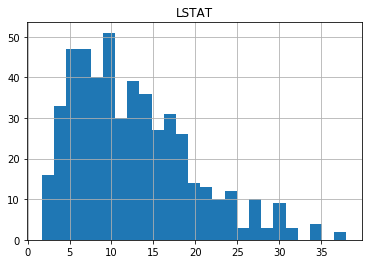

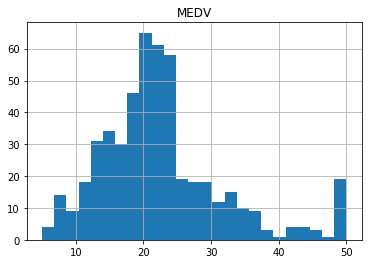

In [9]:
# Histograma para cada variable
for column in data:
    data.hist(column, bins=25)

Text(0.5, 1.0, 'RAD')

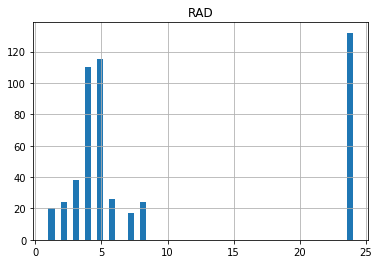

In [10]:
data['RAD'].hist(bins=50)
plt.title('RAD')

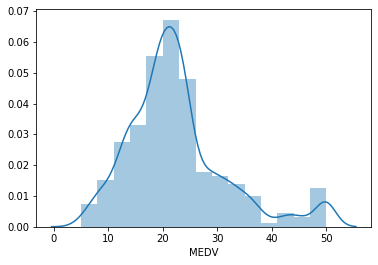

In [11]:
import seaborn as sns
sns.distplot(data['MEDV'], bins=15)

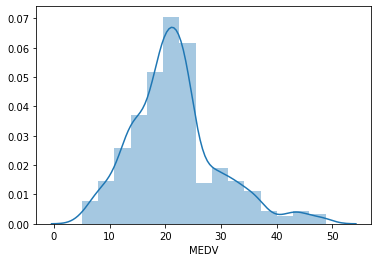

In [12]:
# Se descartan los datos con un valor MEDV igual a 50
data = data.loc[data['MEDV'] != 50]
sns.distplot(data['MEDV'], bins=15)

In [15]:
# Correlaciones entre variables
corr = data.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.38,0.46,-0.45
ZN,-0.20,1.00,-0.53,-0.05,-0.51,0.31,-0.56,0.67,-0.31,-0.30,-0.38,0.18,-0.42,0.40
INDUS,0.41,-0.53,1.00,0.04,0.77,-0.41,0.64,-0.71,0.60,0.72,0.39,-0.36,0.64,-0.60
CHAS,-0.06,-0.05,0.04,1.00,0.09,0.04,0.07,-0.08,-0.03,-0.07,-0.12,0.04,-0.01,0.07
NOX,0.42,-0.51,0.77,0.09,1.00,-0.32,0.73,-0.77,0.61,0.67,0.19,-0.38,0.61,-0.52
RM,-0.22,0.31,-0.41,0.04,-0.32,1.00,-0.27,0.25,-0.20,-0.28,-0.29,0.12,-0.61,0.69
AGE,0.35,-0.56,0.64,0.07,0.73,-0.27,1.00,-0.74,0.45,0.50,0.27,-0.28,0.64,-0.49
DIS,-0.38,0.67,-0.71,-0.08,-0.77,0.25,-0.74,1.00,-0.49,-0.53,-0.25,0.30,-0.54,0.37
RAD,0.63,-0.31,0.60,-0.03,0.61,-0.20,0.45,-0.49,1.00,0.91,0.46,-0.45,0.51,-0.48
TAX,0.58,-0.30,0.72,-0.07,0.67,-0.28,0.50,-0.53,0.91,1.00,0.45,-0.45,0.57,-0.57


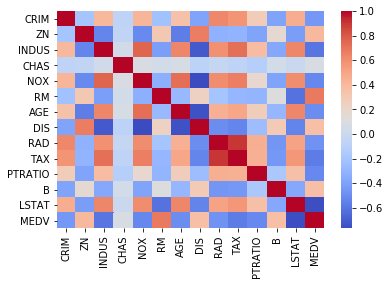

In [14]:
# Otra visualización de la correlación
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.show()

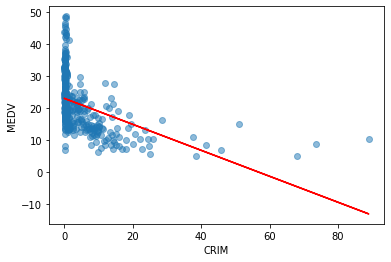

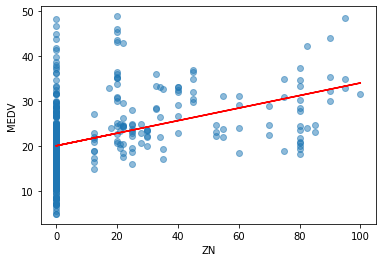

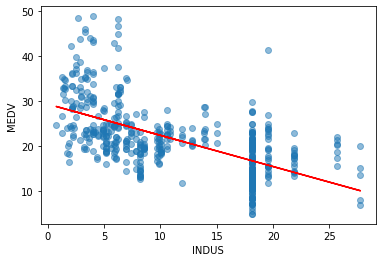

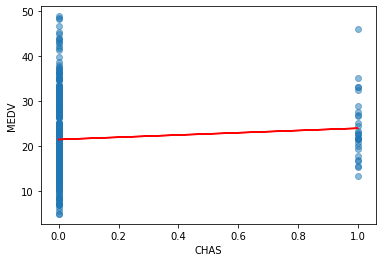

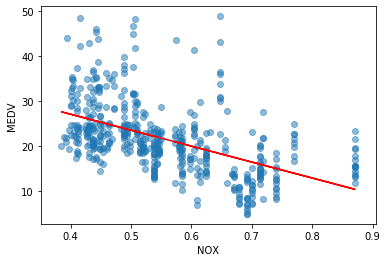

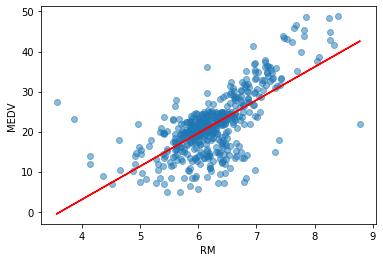

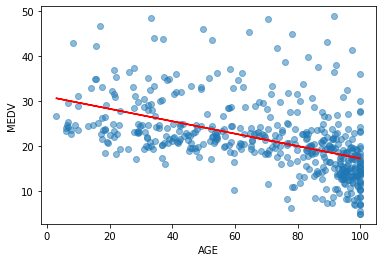

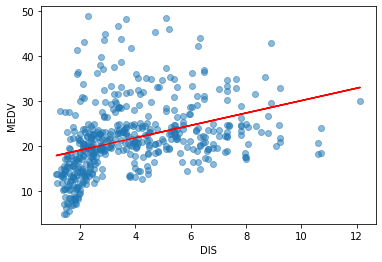

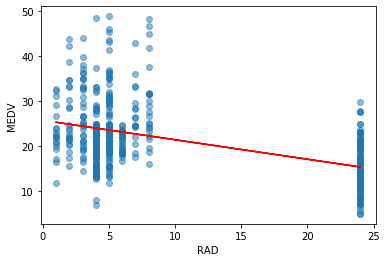

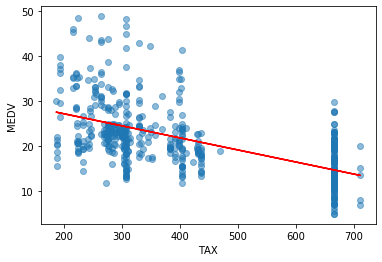

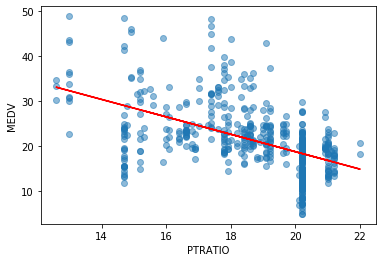

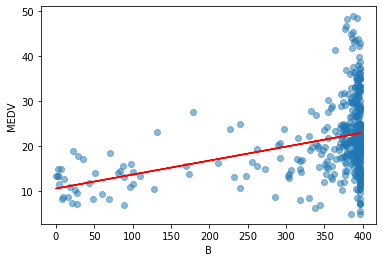

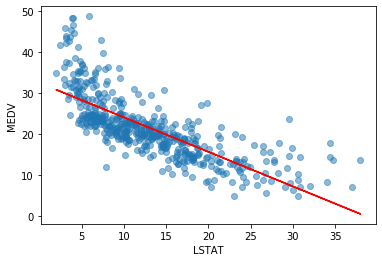

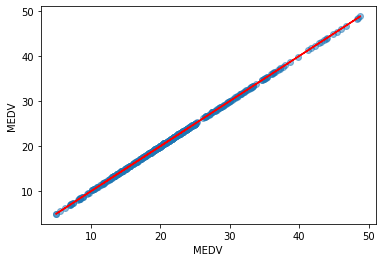

In [62]:
# correlación de todas las variables versus MEDV
for column in data:
    plt.ylabel('MEDV')
    plt.xlabel(column)
    plt.scatter(data[column], data['MEDV'], alpha=0.5)
    m, b = np.polyfit(data[column], data['MEDV'], 1)
    plt.plot(data[column], m * data[column] + b, color='r')
    plt.show()

### Preparación de los datos

In [63]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [64]:
# División en variables dependientes e independientes
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

In [65]:
# Se escalan los valores de las variables para que tomen valores entre 0 y 1
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(np.array(y).reshape(-1, 1)).reshape(len(data))

In [66]:
# División en datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

### Entrenamiento de modelos

In [67]:
scores = {}

In [68]:
# Función para obtener MSE y R2 en base a un modelo entrenado
def get_scores(model):
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    print("adjusted R2 Score: ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
    mse = mean_squared_error(y_test, pred)
    print("MSE: ", mse)
    return [mse, r2]

**Support vector machine**

In [69]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
param_grid={
    "C": [1, 10, 100, 1000], 
    "gamma": np.logspace(-2, 2, 5)
}
grid_sv = GridSearchCV(svr_rbf, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_train, y_train)

print("Best params: ", grid_sv.best_params_)
scores['SVM'] = get_scores(grid_sv)

svr_rbf = grid_sv

Best params:  {'C': 100, 'gamma': 0.1}
adjusted R2 Score:  0.7707652408403545
MSE:  0.008001041109952358


**Decision Trees**

In [70]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor()
param_grid={
    "criterion": ["mse", "friedman_mse", "mae"],
    "max_depth": range(1,15),
}
grid_sv = GridSearchCV(desc_tr, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_train, y_train)

print("Best params: ", grid_sv.best_params_)
scores['DT'] = get_scores(grid_sv)

desc_tr = grid_sv

Best params:  {'criterion': 'friedman_mse', 'max_depth': 5}
adjusted R2 Score:  0.7586639002048943
MSE:  0.008423417385979605


**KNeighbors**

In [71]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
param_grid={
    "n_neighbors" : [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 19],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
grid_sv = GridSearchCV(knn, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_train, y_train)

print("Best params: ", grid_sv.best_params_)
scores['KN'] = get_scores(grid_sv)

knn = grid_sv

Best params:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
adjusted R2 Score:  0.6036944669999063
MSE:  0.013832356285143729


**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
param_grid={
    "max_depth" : [30, 40, 50, 60], 
    "n_estimators": [150, 200, 300, 500],
    "min_samples_split": [2, 3],
}
grid_sv = GridSearchCV(rf, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_train, y_train)

print("Best params: ", grid_sv.best_params_)
scores['RF'] = get_scores(grid_sv)

rf = grid_sv

Best params:  {'max_depth': 50, 'min_samples_split': 3, 'n_estimators': 300}
adjusted R2 Score:  0.8018137395283247
MSE:  0.006917347191475776


**Gradient Boosting**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
param_grid={
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "n_estimators":[100, 200, 250]
}
grid_sv = GridSearchCV(gbr, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(X_train, y_train)

print("Best params: ", grid_sv.best_params_)
scores['GB'] = get_scores(grid_sv)

gbr = grid_sv

Best params:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 250}
adjusted R2 Score:  0.826022882170819
MSE:  0.006072369116469274


### Evaluación

In [76]:
print("\tMSE\tadjusted R2")
for s in scores:
    print(s+'\t'+str(round(scores[s][0],4))+'\t'+str(round(scores[s][1],4)))

	MSE	adjusted R2
SVM	0.008	0.8015
DT	0.0084	0.791
KN	0.0138	0.6568
RF	0.0069	0.8284
GB	0.0061	0.8493


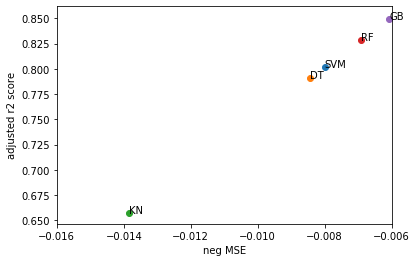

In [77]:
results = pd.DataFrame(scores)
fig, ax = plt.subplots()
x = - results.iloc[0]
y = results.iloc[1]

for i, txt in enumerate(results.columns):
    ax.scatter(x[i], y[i])
    ax.annotate(txt, (x[i], y[i]))
plt.xlim(-0.016, -0.006)
plt.xlabel("neg MSE")
plt.ylabel("adjusted r2 score")
plt.show()

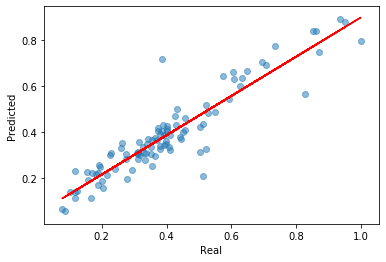

In [79]:
# Best model: Gradient Boosting
pred = gbr.predict(X_test)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.scatter(y_test, pred, alpha=0.5)
m, b = np.polyfit(y_test, pred, 1)
plt.plot(y_test, m * y_test + b, color='r')
plt.show()

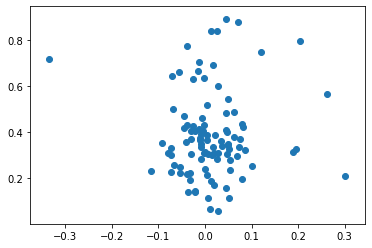

In [80]:
# Residual plot
residuals = y_test-pred
plt.scatter(residuals, pred)
plt.show()